<a href="https://colab.research.google.com/github/ahmadjan223/machine-learning/blob/main/w2d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X = data.drop(columns='Outcome')
y = data['Outcome']


# decision tree variation with changing ratio

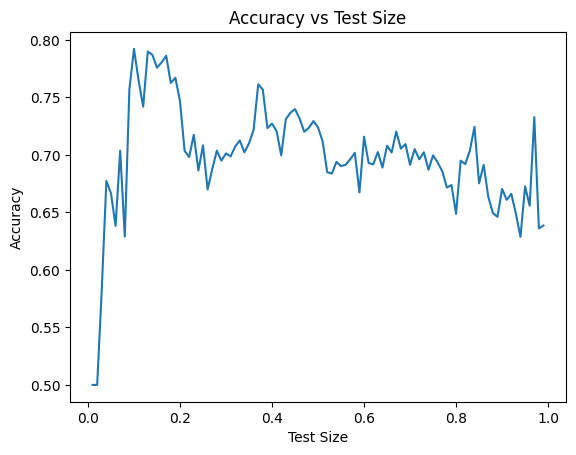

In [48]:
plotGraph = pd.DataFrame({'accuracy':[],'test_size':[]})
for i in range(1, 100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)
  clf = DecisionTreeClassifier(random_state=42)
# Train the classifier
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  plotGraph = pd.concat([plotGraph, pd.DataFrame({'accuracy': [accuracy], 'test_size': [i/100]})], ignore_index=True)
plt.plot(plotGraph['test_size'], plotGraph['accuracy'])
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size')
plt.show()

#svc variation with changing ratio

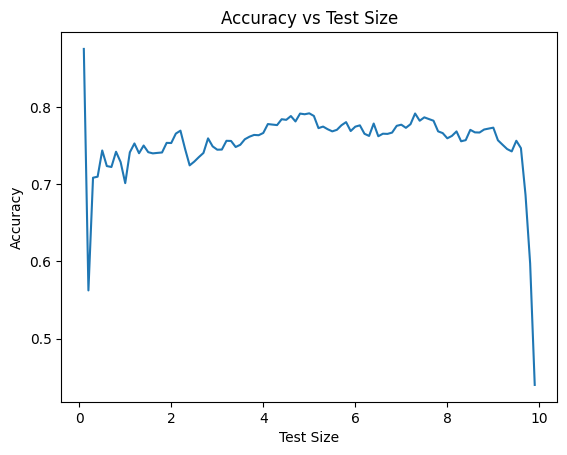

In [50]:
plotGraph = pd.DataFrame({'accuracy':[],'test_size':[]})
for i in range(1, 100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)
  clf = DecisionTreeClassifier(random_state=42)
# Train the classifier
  svm_model = SVC(kernel='linear')
  svm_model.fit(X_train, y_train)

  y_pred = svm_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  plotGraph = pd.concat([plotGraph, pd.DataFrame({'accuracy': [accuracy], 'test_size': [i/10]})], ignore_index=True)
plt.plot(plotGraph['test_size'], plotGraph['accuracy'])
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size')
plt.show()

#classification with decision tree

In [27]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
# Train the classifier
clf.fit(X_train, y_train)
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 461 entries, 668 to 180
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               461 non-null    int64  
 1   Glucose                   461 non-null    int64  
 2   BloodPressure             461 non-null    int64  
 3   SkinThickness             461 non-null    int64  
 4   Insulin                   461 non-null    int64  
 5   BMI                       461 non-null    float64
 6   DiabetesPedigreeFunction  461 non-null    float64
 7   Age                       461 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.4 KB


In [28]:
y_pred = clf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7158351409978309
Confusion Matrix:
[[231  68]
 [ 63  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       299
           1       0.59      0.61      0.60       162

    accuracy                           0.72       461
   macro avg       0.69      0.69      0.69       461
weighted avg       0.72      0.72      0.72       461



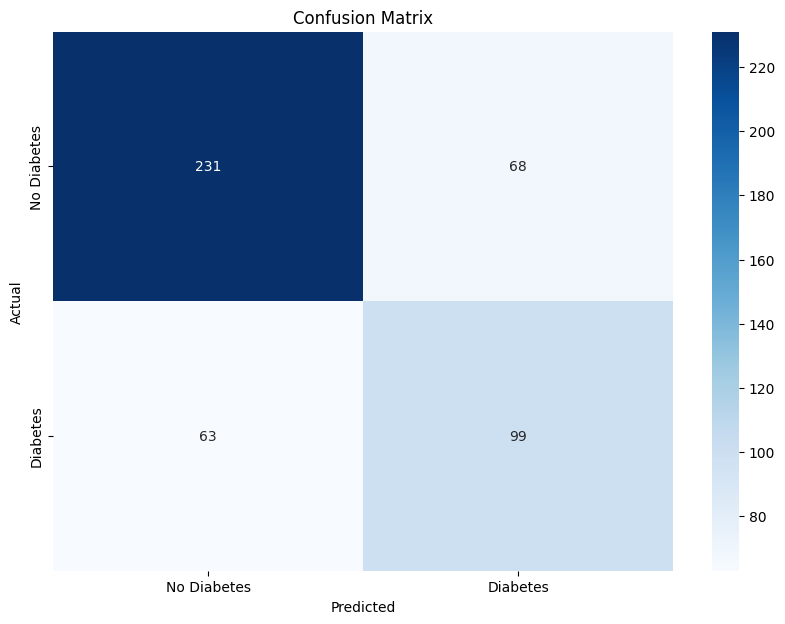

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#svm

In [31]:
# prompt: implement svm

from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


In [32]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report of svc:")
print(class_report)

Accuracy: 0.7158351409978309
Confusion Matrix:
[[231  68]
 [ 63  99]]
Classification Report of svc:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       299
           1       0.59      0.61      0.60       162

    accuracy                           0.72       461
   macro avg       0.69      0.69      0.69       461
weighted avg       0.72      0.72      0.72       461



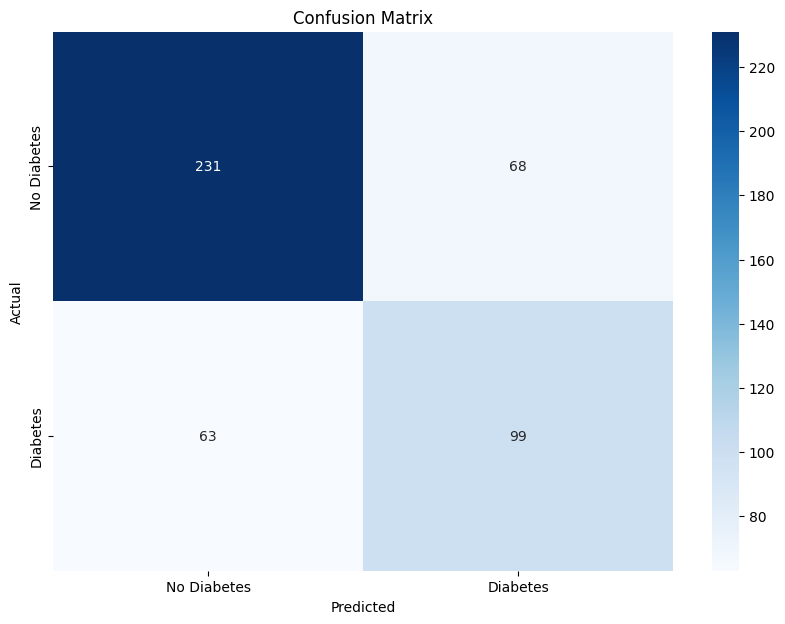

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.7700650759219089
Confusion Matrix:
[[253  46]
 [ 60 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       299
           1       0.69      0.63      0.66       162

    accuracy                           0.77       461
   macro avg       0.75      0.74      0.74       461
weighted avg       0.77      0.77      0.77       461



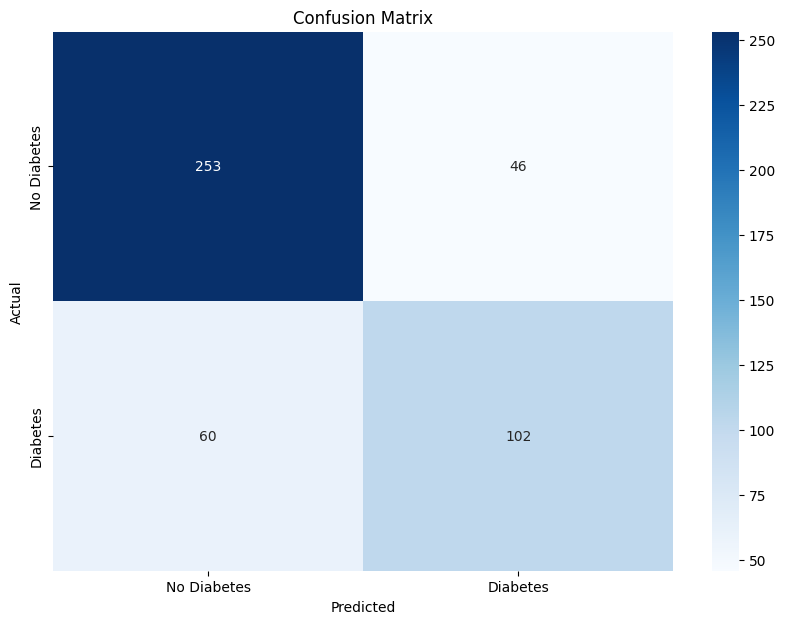

In [35]:
# prompt: import random forest

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the classifier
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
